<a href="https://colab.research.google.com/github/MrD0balina/Fourth-Year-Project---Neutrino-Oscillations/blob/main/Generating_histograms_with_original_unweighted_plotting_functions_at_different_values_of_theta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy import interpolate
from scipy.interpolate import CubicSpline


from textwrap import wrap
from math import cos
from math import pi
from math import log
import pandas as pd

#NOTE: There is no interpolation work included in this notebook.  This is all code taken from week 1.

#Proton energy confusion stems from the paper given as a template in week 1; see link: https://arxiv.org/pdf/hep-ex/0111033

#Look at the second plot showing Relative Neutrino Flux (on page 6) - it states proton energy is 12GeV...

#So, I worked according to that energy.  But, Main Injector proton beam has average proton energy 120Gev...

#Should I redo the plots from the first week with this additional order of magnitude for Proton energy?

In [ ]:
m_pi = 139.6 * ( 10 ** -3 )        # Units = GeV ( Source = PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1" )

E_v_star = 29.8 * ( 10 ** -3 )     # Units = GeV ( Source =  = PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1" )

E_pro = 12                     # Units = GeV  ( Source = https://en.wikipedia.org/wiki/Fermilab#Fermilab_Accelerator_Complex )

# E_pro = 120

In [ ]:
####################### FIRST TRY RELATIVE NEUTRINO FLUX WITH PROTON ENERGY UNCERTAINTY ######################

#### FUNCTION DOES NOT INCLUDE PION WEIGHTING ####

#### FUNCTION DOES NOT INCLUDED PROTON  ENERGY ARRAY ####

def FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( theta ):

        E_v = np.linspace( 0 , 4 , 10000000 )

        my_mean = 120

        my_std = 6   # standard deviation, "spread" or "width"    #### WHAT IS THE STANDARD DEVITAITON OF THE PROTON ENERGY DISTRIBUTION FOR PROTONS COMING OUT OF THE MAIN INJECTOR? ####
                                                                   #### My standard deviation is very large ####

        E_pro_array = np.random.normal(  loc = my_mean, scale = my_std, size = 10000000 ) ## Producing an array of proton energies.

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        #### FUNCTION DOES NOT INCLUDE PION WEIGHTING ####

        Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )  ## Think there is a problem in this line - I am not using the array of proton energies

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0

        for i in range(1, len(Rel_Neu_Flux)):
                neighbouring_element_difference = (Rel_Neu_Flux[i] - Rel_Neu_Flux[i-1])

                if neighbouring_element_difference == 0.000:

                        break
                else:

                        continue

        Rel_Neu_Flux = Rel_Neu_Flux[:i]

        E_v = E_v[:i]

        return E_v , Rel_Neu_Flux , E_pro_array , E_pi

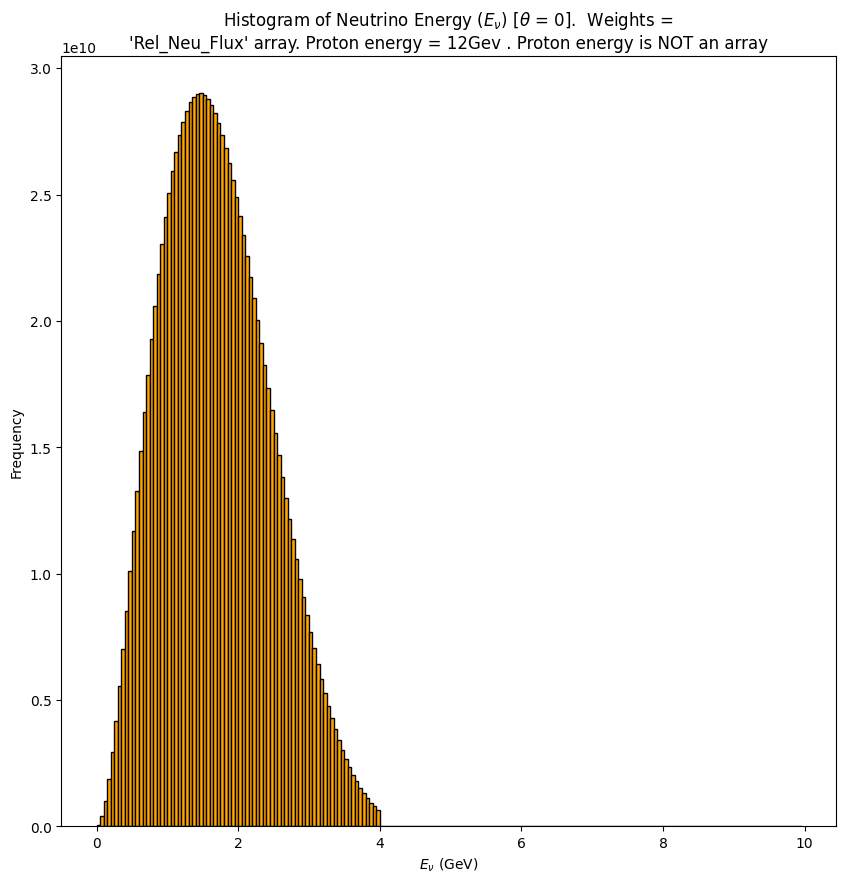

In [ ]:
x_1 , y_1 , z_1 , E_pi_datatype_test = FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( 0.00 )

plt.figure(figsize=(10, 10))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )

plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "black" , ls = "-" , color = "orange" )

plt.title("\n".join(wrap(r"Histogram of Neutrino Energy ($E_{\nu}$) [$\theta$ = 0].  Weights = 'Rel_Neu_Flux' array. Proton energy = 12Gev . Proton energy is NOT an array" , 80 ) ) )

# plt.title("\n".join(wrap(r"Figure 7: Comparison of best interpolated line and the data plotted in Figure 5" , 120 ) ) )




plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")

plt.show()

<ipython-input-4-e3f7713f42bb>:18: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


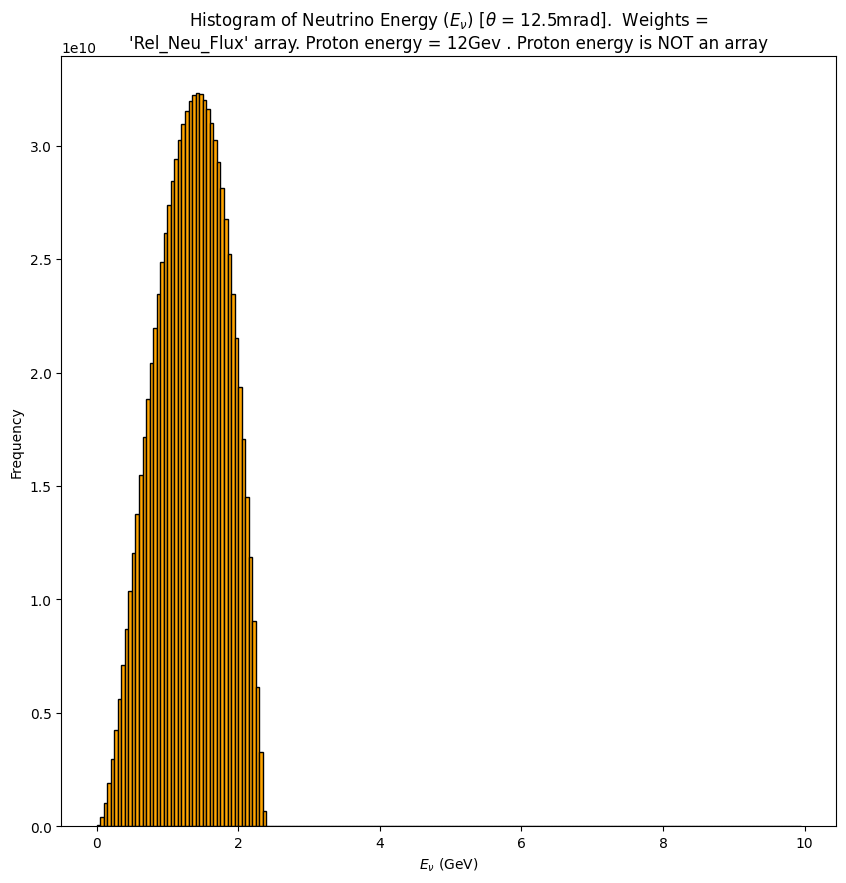

In [ ]:
# Histogram of relative neutrino flux for portion of detector at smallest angular off-axis angle

x_1 , y_1 , z_1 , E_pi_datatype_test = FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( 0.0125 )

plt.figure(figsize=(10, 10))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )

plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "black" , ls = "-" , color = "orange" )

plt.title("\n".join(wrap(r"Histogram of Neutrino Energy ($E_{\nu}$) [$\theta$ = 12.5mrad].  Weights = 'Rel_Neu_Flux' array. Proton energy = 12Gev . Proton energy is NOT an array" , 80 ) ) )

# plt.title("\n".join(wrap(r"Figure 7: Comparison of best interpolated line and the data plotted in Figure 5" , 120 ) ) )




plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")

plt.show()

<ipython-input-4-e3f7713f42bb>:18: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


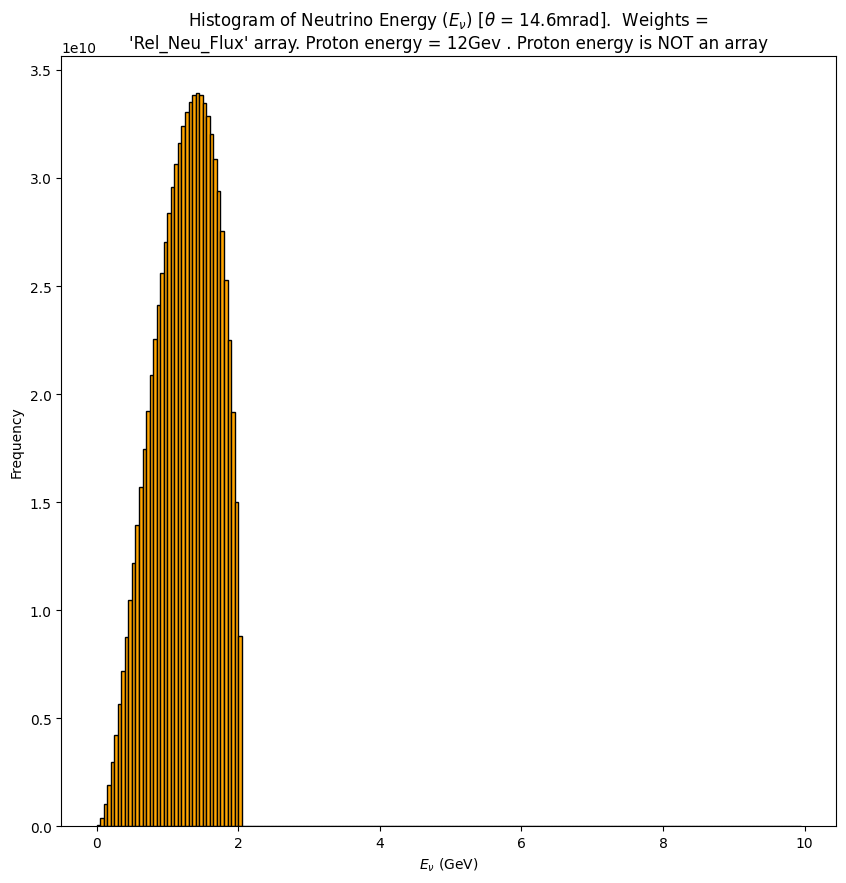

In [ ]:
# Histogram of relative neutrino flux for middle portion  of the near detector

x_1 , y_1 , z_1 , E_pi_datatype_test = FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( 0.0146 )

plt.figure(figsize=(10, 10))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )

plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "black" , ls = "-" , color = "orange" )

plt.title("\n".join(wrap(r"Histogram of Neutrino Energy ($E_{\nu}$) [$\theta$ = 14.6mrad].  Weights = 'Rel_Neu_Flux' array. Proton energy = 12Gev . Proton energy is NOT an array" , 80 ) ) )

# plt.title("\n".join(wrap(r"Figure 7: Comparison of best interpolated line and the data plotted in Figure 5" , 120 ) ) )




plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")

plt.show()

<ipython-input-4-e3f7713f42bb>:18: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


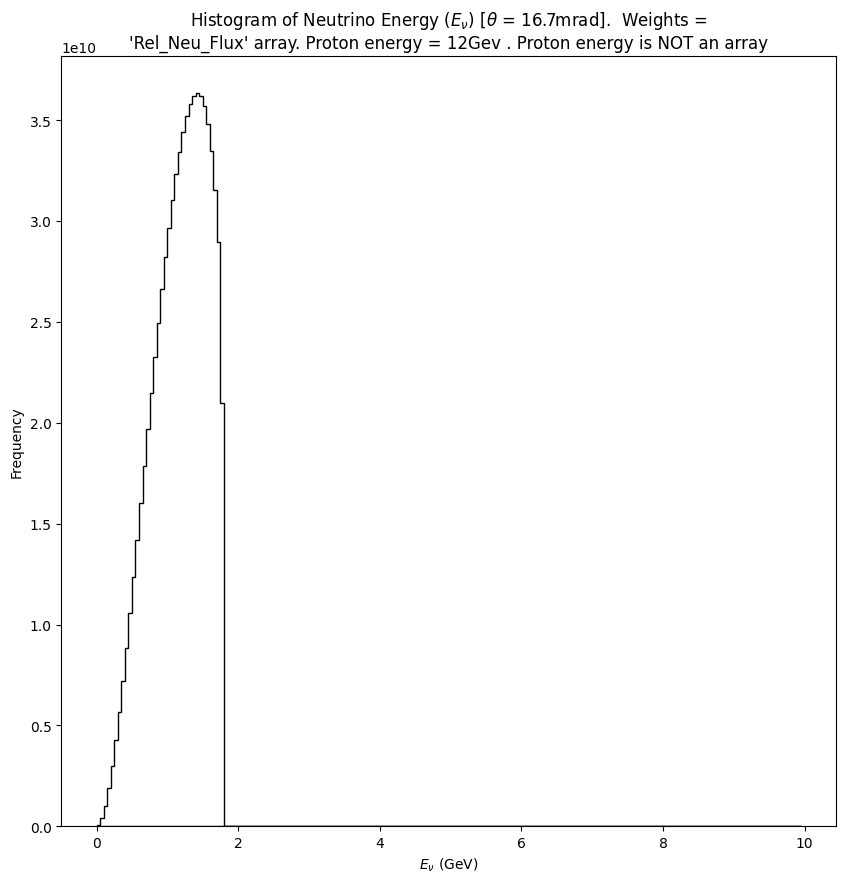

In [ ]:
# Histogram of relative neutrino flux for portion of detector at largest off-axis angle
x_1 , y_1 , z_1 , E_pi_datatype_test = FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( 0.0167 )

plt.figure(figsize=(10, 10))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )

#plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "black" , ls = "-" , color = "orange" )

plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "black" , ls = "-" , facecolor = "None" , histtype='stepfilled' )

plt.title("\n".join(wrap(r"Histogram of Neutrino Energy ($E_{\nu}$) [$\theta$ = 16.7mrad].  Weights = 'Rel_Neu_Flux' array. Proton energy = 12Gev . Proton energy is NOT an array" , 80 ) ) )

# plt.title("\n".join(wrap(r"Figure 7: Comparison of best interpolated line and the data plotted in Figure 5" , 120 ) ) )




plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")

plt.show()

<ipython-input-4-e3f7713f42bb>:18: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


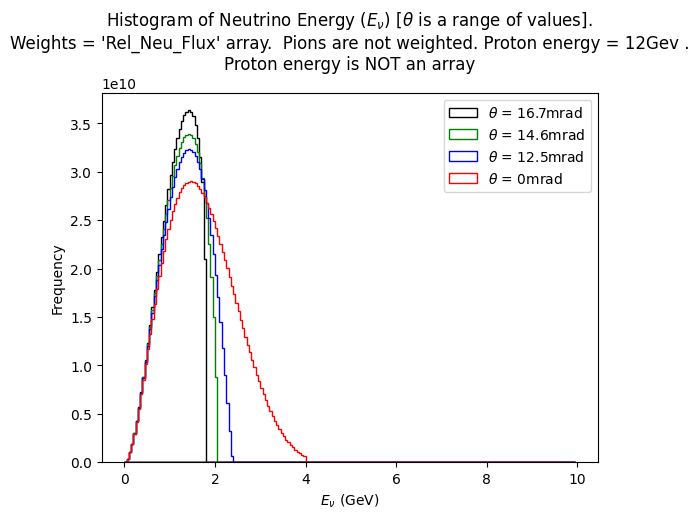

In [ ]:
# Histogram of relative neutrino flux for portion of detector at largest off-axis angle
x_1 , y_1 , z_1 , E_pi_datatype_test = FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( 0.0167 )
plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "black" , ls = "-" , facecolor = "None" , histtype='stepfilled', label = r'$\theta$ = 16.7mrad' )

# Histogram of relative neutrino flux for middle portion  of the near detector
x_1 , y_1 , z_1 , E_pi_datatype_test = FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( 0.0146 )
plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "green" , ls = "-" , facecolor = "None" , histtype='stepfilled' , label = r'$\theta$ = 14.6mrad' )

# Histogram of relative neutrino flux for portion of detector at smallest angular off-axis angle
x_1 , y_1 , z_1 , E_pi_datatype_test = FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( 0.0125 )
plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "blue" , ls = "-" , facecolor = "None" , histtype='stepfilled' , label = r'$\theta$ = 12.5mrad' )

# Histogram of relative neutrino flux for portion of detector at smallest angular off-axis angle
x_1 , y_1 , z_1 , E_pi_datatype_test = FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( 0.00 )
plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "red" , ls = "-" , facecolor = "None" , histtype='stepfilled' , label = r'$\theta$ = 0mrad' )

plt.title("\n".join(wrap(r"Histogram of Neutrino Energy ($E_{\nu}$) [$\theta$ is a range of values].  Weights = 'Rel_Neu_Flux' array.  Pions are not weighted. Proton energy = 12Gev . Proton energy is NOT an array" , 80 ) )  )

plt.legend()

#plt.xlim(2.5)

plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")

plt.show()

